# Линейная регрессия


Линейные методы предполагают, что между признаками объекта и целевой переменной существует линейная зависимость, то есть:
$$ \hat{y} = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b,$$
где $\hat{y}$ - целевая переменная (что мы хотим предсказать), $x_i$ - i-ый признак объекта $x$, $w_i$ - вес $i$-го признака, $b$ - bias (смещение, свободный член).

В задаче линейной регрессии $\hat{y}$ - это действительное число.

Часто для упрощения записи вводят дополнительный фиктивный признак $x_0$, который всегда равен 1, тогда bias - вес этого признака. В этом случае формула может быть записана как скалярное произведение:
$$ \hat{y} = <w, x> $$

В матричной форме формулу можно переписать следующим образом:
$$ \hat{y} = Xw,$$
$\hat{y}$ - вектор значений целевой переменной размера $n$, $X$ - матрица значений признаков объектов размера $n \times k$, w - вектор весов размера $k$. То есть в наших данных имеется $n$ объектов, каждый их которых описан $k$ признаками.

Таким образом, в матричной форме модель задаётся следующим образом:
$$ y = Xw + \epsilon$$ 

Важно отметить, что параметрами этой модели являются веса $w$. Когда говорят об обучении какого-либо алгоритма машинного обучения, как правило, имеют в виду настройку весов, т.е. параметров модели.  

На практике $\hat{y} $ может отличается от реальных значений, которые принимает целевая переменная $y$. Разницу между реальным значением и предсказанным, обозначим как $\epsilon$ - вектор значений случайной переменной, соответствующая случайной, непрогнозируемой ошибке модели. Ограничения, которые накладываются на эту модель:
* математическое ожидание случайных ошибок $\epsilon$ равно нулю,
* дисперсия случайных ошибок одинакова и конечна,
* случайные ошибки не скоррелированы.

Один из способов вычислить значения параметров модели, давно знаком - это наименьших квадратов, который минимизирует среднеквадратичную ошибку между реальным значением зависимой переменной и прогнозом, выданным моделью. Решение по методу наименьших квадратов дает:
$$ w = (X^TX)^{-1}X^TY $$

Загрузим необходимые библиотеки

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Оценка результатов

Чтобы оценить качество работы алгоритма нам необходимо применяют разные метрики. Наиболее частые метрики средневадратичная и средняя абсолютная ошибки. Вычислим эти метрики на обучающей и на тестовой выборках. 

 * *mean_absolute_error* - средняя абсолютная ошибка $|y_i - \hat{y}_i|$
 * *mean_squared_error* - средняя квадратичная ошибка $(y_i - \hat{y}_i)^2$

## Задание 3.1

Пример 1. Сгенерируем искусственные данные. Сначала поработаем с простейшим одномерным случаем, когда у нас значение $y$ будет зависеть только от одного значения $x$.




In [ ]:
def generate_data(n_points=20):
  """
    Принимает на вход n_points точек 
    Возвращает данные для обучения и теста
  """
  X = np.linspace(-5, 5, n_points)
  Y = 10 * X - 7

  X_train = X[0::2].reshape(-1, 1)# Делаем столбец
  Y_train = Y[0::2] + np.random.randn(int(n_points/2)) * 10

  X_test = X[1::2].reshape(-1, 1) # Делаем столбец
  Y_test = Y[1::2] + np.random.randn(int(n_points/2)) * 10

  print(f'Generated {len(X_train)} train samples and {len(X_test)} test samples')
  return X, Y, X_train, Y_train, X_test, Y_test

In [ ]:
X, Y, X_train, Y_train, X_test, Y_test = generate_data(100)

Generated 50 train samples and 50 test samples


___ Собственные методы ___
w: [9.97617037]
b: -8.258985203827603
MAE: 7.487999043905718
MSE: 88.21561950059264


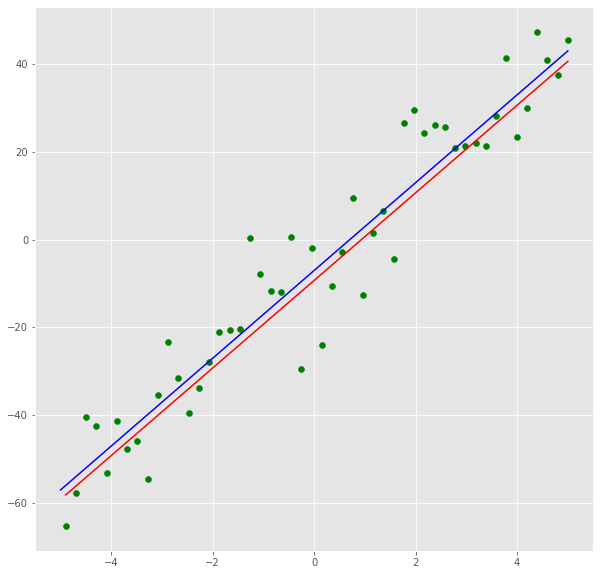

In [ ]:
### Реализуйте настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE. Сравните с результатами из sklearn
def train(train_X, train_Y): # Y строка, X столбец
  # print(train_X.shape) # (50, 1)
  # print(train_Y.shape) # (50,)
  X1 = np.insert(train_X, 1, 1, axis=1) # (50, 2)

  # print(X1.shape)

  weight , bias = np.linalg.inv((X1.T).dot(X1)).dot((X1.T).dot(train_Y))
  return np.array([weight]), bias

def mae(correct, predicted):
  return np.mean(abs(correct-predicted))

def mse(correct, predicted):
  return np.mean((correct-predicted)**2)

w, b = train(X_train, Y_train)
Y_predicted=X_train.dot(w)+b
mae_value = mae(Y_test, Y_predicted)
mse_value = mse(Y_test, Y_predicted)

print('___ Собственные методы ___')
print("w: {}\nb: {}".format(w, b))
print("MAE: {}\nMSE: {}".format(mae_value, mse_value))

plt.figure(figsize=(10, 10))
plt.scatter(X_test, Y_test, color='green')
plt.plot(X, Y, color='blue')
plt.plot(X_test, Y_predicted, color='red')
plt.show() # Видно что граффики почти идеально совпадают

_______ sklearn _______
w: [9.97617037]
b: -8.258985203827605
MAE: 8.429774892807476
MSE: 124.7358550065337


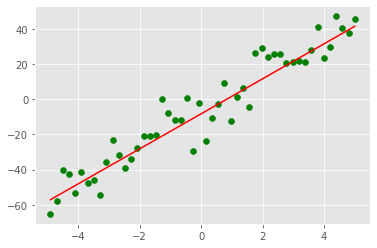

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
mae_value=mean_absolute_error(Y_train, lin_reg.predict(X_train))
mse_value=mean_squared_error(Y_train, lin_reg.predict(X_train))

print('_______ sklearn _______')
print("w: {}\nb: {}".format(lin_reg.coef_, lin_reg.intercept_))
print("MAE: {}\nMSE: {}".format(mae_value, mse_value))

plt.scatter(X_test, Y_test,color='green')
plt.plot(X_test, lin_reg.predict(X_test), color='red')
plt.show()

## Задание 3.2

Пример 2. Не всегда в задаче регрессии в качестве решения выступает прямая, как в предыдущем случае. Рассмотрим ещё один пример, в котором у объектов всё ещё один признак. Но теперь мы будм брать случайную точку на синусоиде и добавлять к ней шум — таким образом получим целевую переменную, признаком в этом случае будет координата $x$.

In [ ]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    data = {}
    # выберем некоторое количество точек из промежутка от 0 до 2*pi
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # для каждой посчитаем значение sin(x) + 1
    # это будет ground truth
    data['values'] = np.sin(data['support']) + 1
    # из support посемплируем некоторое количество точек с возвратом, это будут признаки
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # опять посчитаем sin(x) + 1 и добавим шум, получим целевую переменную
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data

data = generate_wave_set(1000, 250)

___ Собственные методы ___
w: [9.97617037]
b: -8.258985203827603
MAE: 27.15584871398566
MSE: 1000.2464121603219


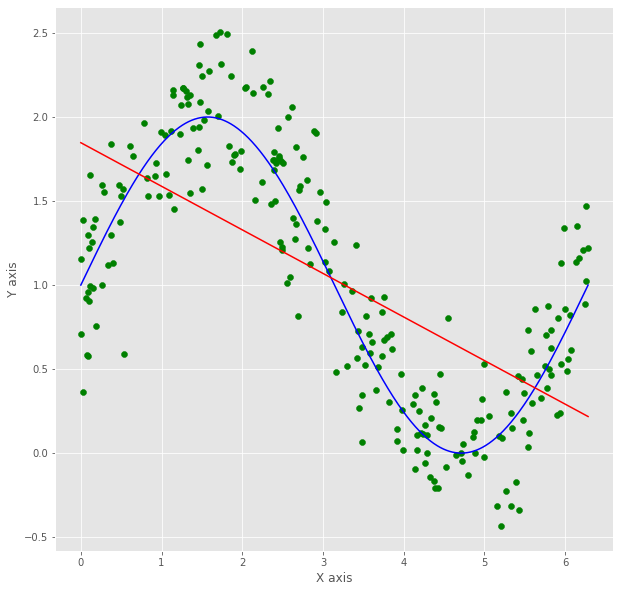

In [ ]:
### попробуйте реализовать настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE
X_train2=data['x_train'].reshape(-1,1)
Y_train2=data['y_train'].reshape(-1,1)

w2, b2 = train(X_train2, Y_train2)

Y_predicted=data['support'].reshape(-1,1).dot(w2)+b2
mae_value = mae(Y_test, Y_predicted)
mse_value = mse(Y_test, Y_predicted)

print('___ Собственные методы ___')
print("w: {}\nb: {}".format(w, b))
print("MAE: {}\nMSE: {}".format(mae_value, mse_value))

plt.figure(figsize=(10, 10))
plt.plot(data['support'].reshape(Y_predicted.shape[0],-1), data['values'].reshape(Y_predicted.shape[0],-1), color='blue')
plt.plot(data['support'].reshape(Y_predicted.shape[0],-1), Y_predicted, color='red')
plt.scatter(data['x_train'], data['y_train'],color='green')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

Конечно, такое решение нас вряд ли может устроить. Нужно применить полинимиальную регрессию. Идея здесь такая. Каждый признак в исходную формулу может входить не только в первой степени, но и во второй, в третьей и так далее. То есть для случая, когда у нас только один признак:
$$ \hat{y} = w_1 x_1 + w_2 x_1^2 + ... + w_k x_1^k + b,$$ 

## Задание 3.3

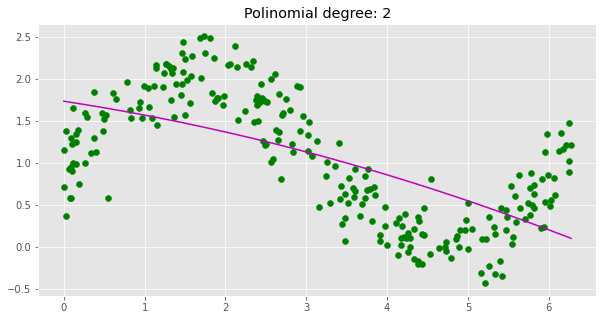

0.3255268694415413


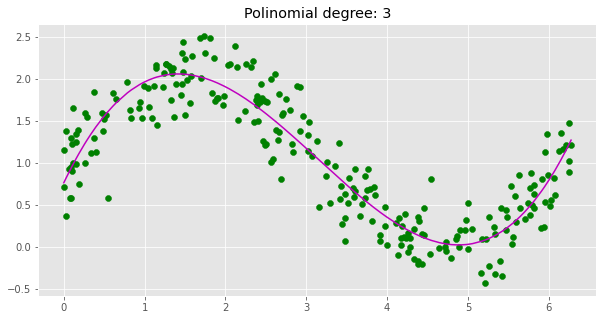

0.08236441982218819


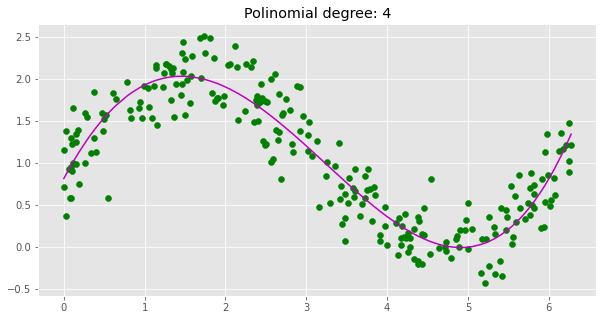

0.08170461161995209


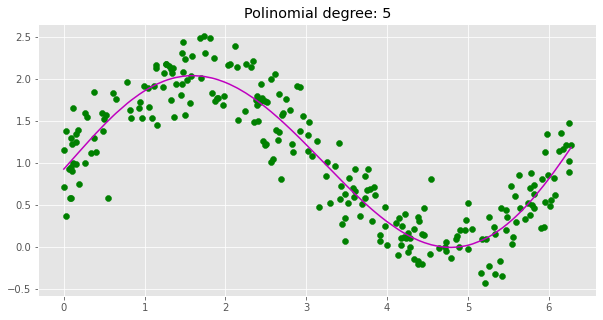

0.07882749933143902


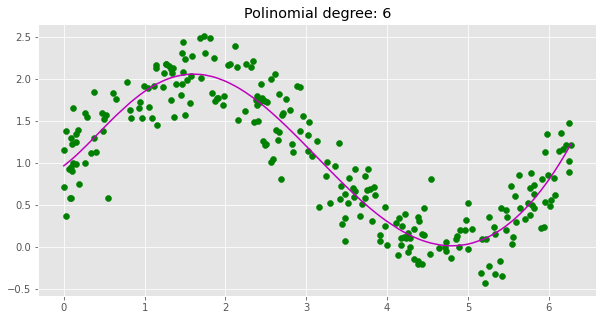

0.07858479267628586


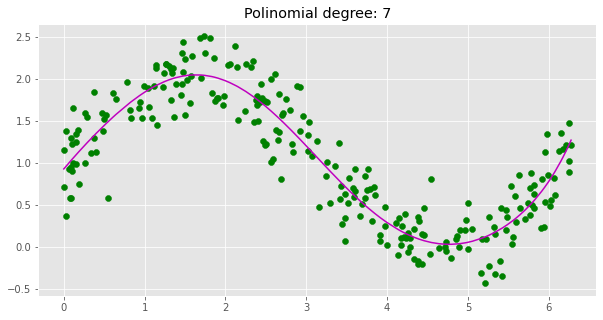

0.0783759859627779


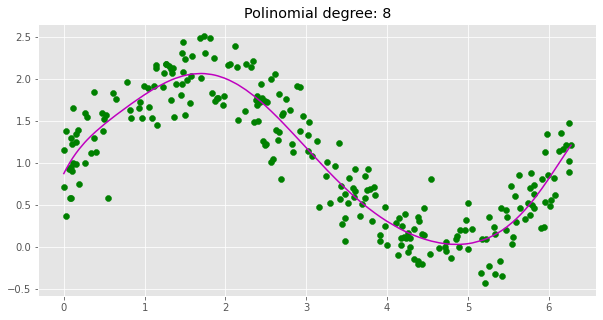

0.077962569343648


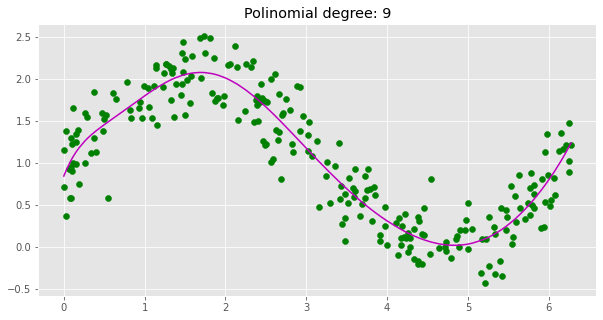

0.07786753965657027


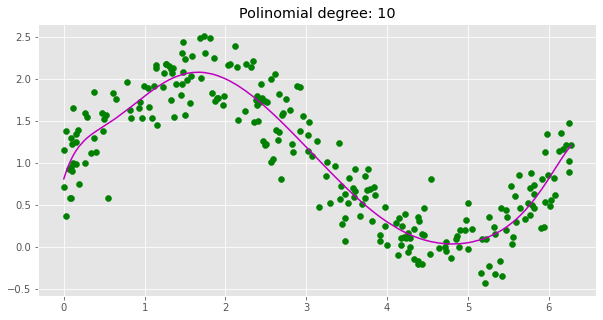

0.07774858146457717
Степень полинома с наименьшей средней квадратичной ошибкой: 10


In [ ]:
### Реализуйте полиномиальную регрессию. Сделайте визуализацию для полиномов разных степеней. 
### Полином какой степени подходит больше других? Почему?
from sklearn.preprocessing import PolynomialFeatures
import operator

def visualise_polinom(deg):
  
  X = data['x_train'].reshape(-1,1)
  Y = data['y_train'].reshape(-1,1)
  polynomial_features= PolynomialFeatures(degree=deg)
  X_poly = polynomial_features.fit_transform(X)

  model = LinearRegression()
  model.fit(X_poly, Y)
  Y_poly_pred = model.predict(X_poly)

  plt.figure(figsize=(10, 5))
  plt.scatter(X, Y, color='green')
  
  sort_axis = operator.itemgetter(0)
  sorted_zip = sorted(zip(X, Y_poly_pred), key=sort_axis)
  X, Y_poly_pred = zip(*sorted_zip)

  plt.plot(X, Y_poly_pred, color='m')
  plt.title('Polinomial degree: {}'.format(deg))
  plt.show()
  mse=mean_squared_error(data["y_train"], Y_poly_pred)
  print(mse)
  return deg, mse

deg_err=[]
for degree in range(2,11):
  deg_err+=[visualise_polinom(degree)]

print('Степень полинома с наименьшей средней квадратичной ошибкой:', min(deg_err, key=operator.itemgetter(1))[0])


# Реальный датасет

Возьмём реальный набор данных Boston из sklearn.datasets. Этот датасет описывает средние цены на недвижимость в районах Бостона в тысячах долларов.

Примеры признаков объектов недвижимости: количество преступлений на душу населения, процент старых домов в районе, количество учеников на одного учителя и т.д. Обратите внимание на то, что данные уже оцифрованы там, где изначально признаки были качественными.

Загрузим датасет, выведем информацию

In [ ]:
from sklearn.datasets import load_boston
import pandas as pd

In [ ]:
house_data = load_boston()
X = pd.DataFrame(house_data['data'], columns=house_data['feature_names'])
Y = house_data['target']
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Задание 3.4

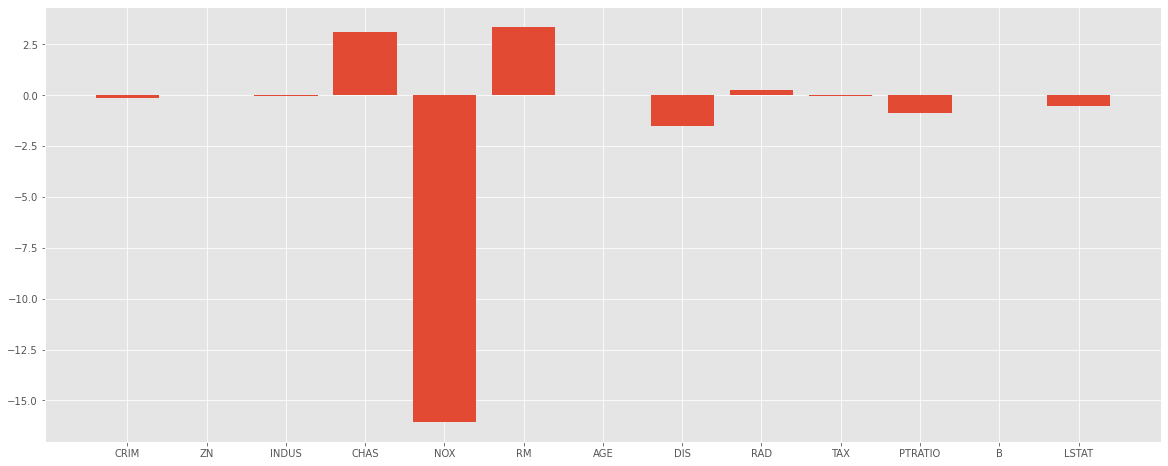

________ Оценка точности ________
(обучение) MSE:  23.25777131248647
(тестовый) MSE:  18.63183947982371
(обучение) MAE:  3.3936138479325697
(тестовый) MAE:  3.119386684377016


In [ ]:
### оставьте в наборе данных только 7 наиболее значимых признаков
### настройте параметры линейной регрессии и сравните метрики качества (MSE и MAE) для полного датасета и усечённого
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

lin_reg = LinearRegression()

lin_reg.fit(X_train, Y_train)

Y_train_prediction = lin_reg.predict(X_train)
Y_test_prediction = lin_reg.predict(X_test)

plt.figure(figsize=(20, 8))
plt.bar(X.columns, lin_reg.coef_)
plt.show()

print('________ Оценка точности ________')
print('(обучение) MSE: ', mean_squared_error(Y_train, Y_train_prediction))
print('(тестовый) MSE: ', mean_squared_error(Y_test, Y_test_prediction))

print('(обучение) MAE: ', mean_absolute_error(Y_train, Y_train_prediction))
print('(тестовый) MAE: ', mean_absolute_error(Y_test, Y_test_prediction))

Выполним нормирровку и снова обучим нашу модель.

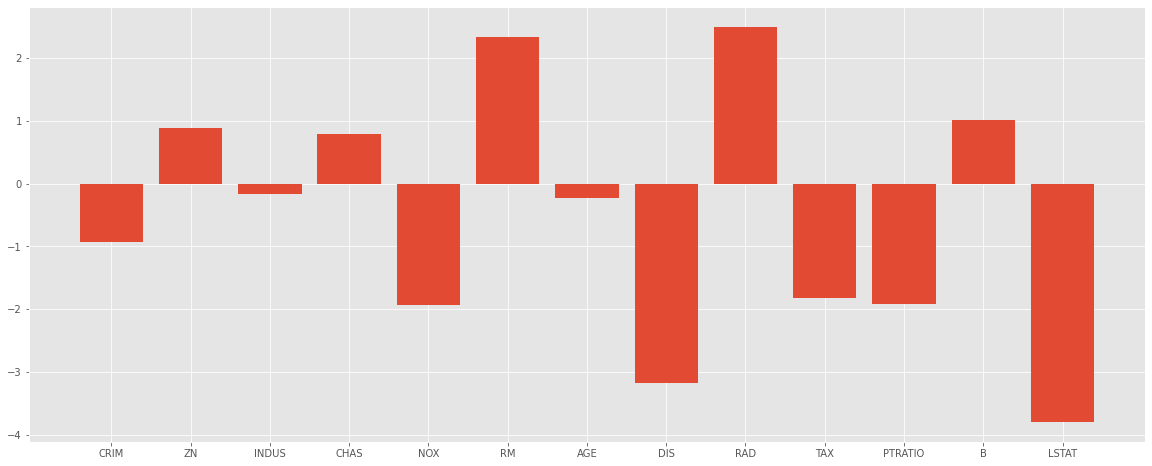

________ Оценка точности ________
(обучение) MSE:  23.257771312486472
(тестовый) MSE:  18.63183947982369
(обучение) MAE:  3.393613847932584
(тестовый) MAE:  3.1193866843770053


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lin_reg = LinearRegression()

lin_reg.fit(X_train, Y_train)

Y_train_prediction = lin_reg.predict(X_train)
Y_test_prediction = lin_reg.predict(X_test)

plt.figure(figsize=(20, 8))
plt.bar(X.columns, lin_reg.coef_)
plt.show()

print('________ Оценка точности ________')
print('(обучение) MSE: ', mean_squared_error(Y_train, Y_train_prediction))
print('(тестовый) MSE: ', mean_squared_error(Y_test, Y_test_prediction))

print('(обучение) MAE: ', mean_absolute_error(Y_train, Y_train_prediction))
print('(тестовый) MAE: ', mean_absolute_error(Y_test, Y_test_prediction))

Создаем новый датафрейм. Отсортируем индексы по модулю в порядке убывния и выведем топ 7 признаков.

7 наиболее значимых признаков
________ Оценка точности ________
(обучение) MSE:  25.90086418060999
(тестовый) MSE:  19.322952192050533
(обучение) MAE:  3.655745749941034
(тестовый) MAE:  3.326488441393709


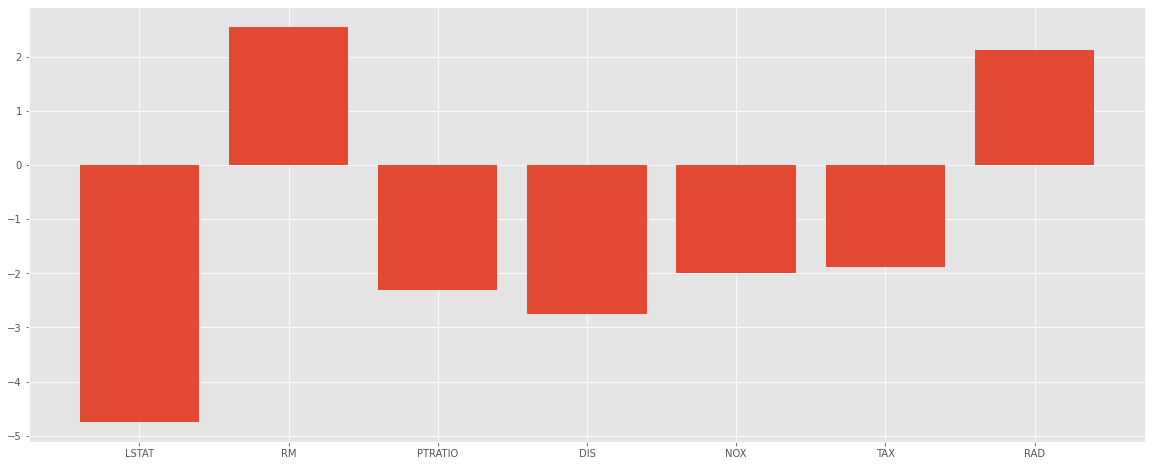

In [ ]:
d = {"coefs": lin_reg.coef_, "feature": X.columns}
coef_feature = pd.DataFrame(data=d)
coef_feature = coef_feature.iloc[(-np.abs(coef_feature["coefs"].values)).argsort()].head(7)

X = X[coef_feature["feature"]]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

Y_train_prediction = lin_reg.predict(X_train)
Y_test_prediction = lin_reg.predict(X_test)

plt.figure(figsize=(20, 8))
plt.bar(X.columns, lin_reg.coef_)

print('7 наиболее значимых признаков')
print('________ Оценка точности ________')
print('(обучение) MSE: ', mean_squared_error(Y_train, Y_train_prediction))
print('(тестовый) MSE: ', mean_squared_error(Y_test, Y_test_prediction))

print('(обучение) MAE: ', mean_absolute_error(Y_train, Y_train_prediction))
print('(тестовый) MAE: ', mean_absolute_error(Y_test, Y_test_prediction))

Модель стала проще, но также потеряла в точности. Это произошло из-за того что другие признаки тоже имели вес и влияли на общий результат.